#Procesamiento de Im√°genes con scikit-image y scipy

###Objetivo: Aprender a leer, convertir y manipular im√°genes usando scikit-image y scipy, con √©nfasis en espacios de color, formatos y estructuras de datos.

##1. Configuraci√≥n Inicial

In [1]:
!pip install scikit-image scipy --quiet  # Instalar si es necesario  # Instala las librer√≠as necesarias: scikit-image y scipy (solo si no est√°n)
from skimage import io, color, data  # Importa funciones de scikit-image para cargar y manipular im√°genes
from scipy import misc  # Importa funciones de scipy (misc se usaba para im√°genes en versiones viejas)
import numpy as np  # Importa NumPy para trabajar con matrices num√©ricas
import matplotlib.pyplot as plt  # Importa matplotlib para mostrar im√°genes
from PIL import Image  # Importa PIL para manipulaci√≥n de im√°genes
#from google.colab import files  # Importa funciones para subir archivos en Google Colab

SciPy es √∫til para realizar:

Operaciones b√°sicas de filtro y suavizado (como el filtro gaussiano o el de Sobel).

Transformaciones geom√©tricas (rotaci√≥n, traslaci√≥n, escalado).

Operaciones morfol√≥gicas (dilatar, erosionar).

An√°lisis y medici√≥n de caracter√≠sticas de la imagen (como etiquetado y centroides).

Convoluci√≥n con kernels personalizados para tareas de filtrado y detecci√≥n de bordes.

SciPy es muy potente para trabajos b√°sicos y avanzados en procesamiento de im√°genes, especialmente cuando se combinan con otras bibliotecas como NumPy o Matplotlib para visualizar los resultados.

##2. Lectura y Visualizaci√≥n de Im√°genes

A. Usando scikit-image

Tipo: <class 'numpy.ndarray'> Dimensiones: (512, 512, 3) Rango de valores: uint8


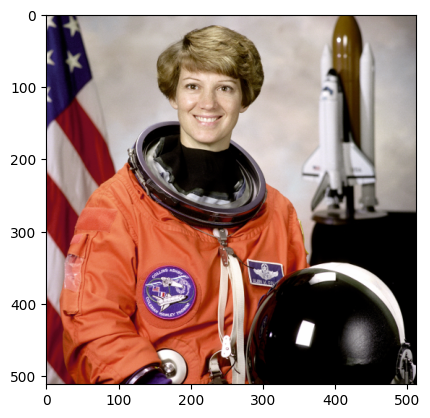

In [8]:
#mUsar imagen de ejemplo (astronauta)
im = data.astronaut()  # Carga una imagen de ejemplo (foto de un astronauta) como array de NumPy ya cargada en skimage.data
print("Tipo:", type(im), "Dimensiones:", im.shape, "Rango de valores:", im.dtype)  # Muestra el tipo, las dimensiones y el tipo de dato de la imagen
# Salida: <class 'numpy.ndarray'> (512, 512, 3) uint8
plt.imshow(im)

B. Usando scipy.misc (solo para versiones antiguas)

<ipython-input-9-fe1a52ffae15>:2: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  im = misc.face()  # Obsoleto en versiones recientes de SciPy


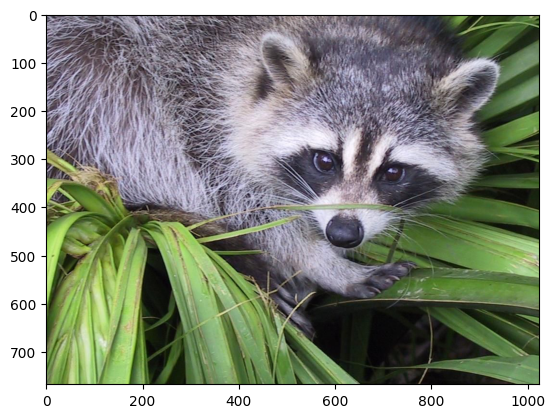

(<matplotlib.image.AxesImage at 0x7f7ff01d6f90>, None)

In [9]:
# Cargar imagen de ejemplo (cara de mapache)
im = misc.face()  # Obsoleto en versiones recientes de SciPy
plt.imshow(im), plt.show()  # Muestra la imagen con matplotlib

Pasamos de RGB a HSV (Matiz, Saturaci√≥n, Valor)
HSV significa:


H (Hue / Matiz): El color en s√≠, representado como un √°ngulo de 0¬∞ a 360¬∞ (rojo, verde, azul, etc.).


S (Saturaci√≥n): Qu√© tan puro es el color (0 = gris, 1 = color intenso).


V (Valor o brillo): Cu√°nto brilla el color (0 = negro, 1 = m√°ximo brillo).

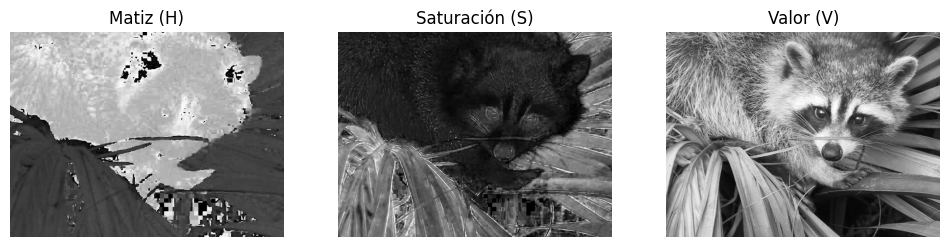

In [5]:
im_hsv = color.rgb2hsv(im)  # Convertir a HSV

# Visualizar canales por separado
plt.figure(figsize=(12, 4))
canales = ['Matiz (H)', 'Saturaci√≥n (S)', 'Valor (V)']
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(im_hsv[:, :, i], cmap='gray')  # Muestra la imagen con matplotlib
    plt.title(canales[i])  # T√≠tulo para la imagen
    plt.axis('off')  # Oculta los ejes
plt.show()  # Muestra el gr√°fico con la imagen

Muestra los tres canales individuales de HSV como im√°genes en escala de grises:


En im_hsv[:, :, 0] ves los valores de matiz (d√≥nde est√°n los colores, pero no su brillo).


En [:, :, 1] ves la saturaci√≥n (zonas m√°s grises o m√°s intensas).


En [:, :, 2] ves el brillo o valor (zonas m√°s claras u oscuras).

In [10]:
h, s, v = im_hsv[700, 100]
print(f"Hue (matiz): {h:.2f}")
print(f"Saturation (saturaci√≥n): {s:.2f}")
print(f"Value (brillo): {v:.2f}")

Hue (matiz): 0.24
Saturation (saturaci√≥n): 0.66
Value (brillo): 0.58


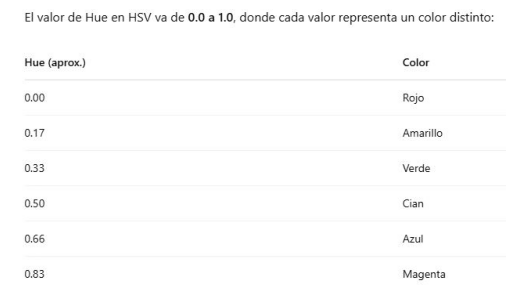

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Cargar la imagen
img = mpimg.imread('explicacion.JPG')  # Aseg√∫rate de poner el nombre correcto del archivo

# Mostrar la imagen
plt.imshow(img)
plt.axis('off')  # Esto desactiva los ejes
plt.show()


üëâ Un Hue de 0.24 est√° entre amarillo y verde claro. M√°s cercano al verde amarillento.

La saturaci√≥n mide cu√°n puro es el color (o cu√°n apagado/‚Äúgris√°ceo‚Äù es).

0.0 ‚Üí gris total (sin color)

1.0 ‚Üí color 100% puro

üëâ Un valor de 0.66 indica que el color es bastante saturado, es decir, se nota bien su color y no es apagado o gris√°ceo.


El valor o "brillo" representa la intensidad luminosa del p√≠xel.

0.0 ‚Üí completamente negro

1.0 ‚Üí completamente brillante (blanco o color puro)

üëâ Un Value de 0.58 es un brillo moderado, ni muy oscuro ni muy claro.

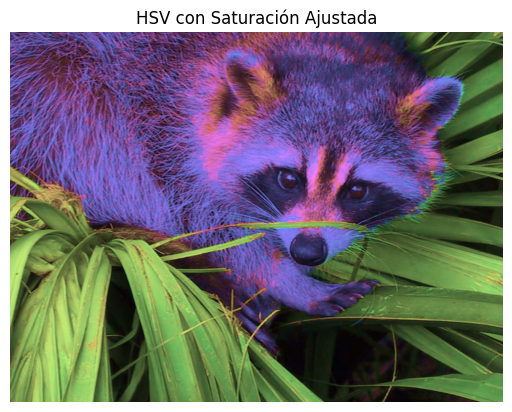

In [15]:
im_hsv_mod = im_hsv.copy()
im_hsv_mod[:, :, 1] = 0.5  # Ajustar saturaci√≥n al 50%
im_rgb_mod = color.hsv2rgb(im_hsv_mod)  # Volver a RGB

plt.imshow(im_rgb_mod)  # Muestra la imagen con matplotlib
plt.title("HSV con Saturaci√≥n Ajustada")  # T√≠tulo para la imagen
plt.axis('off')  # Oculta los ejes
plt.show()  # Muestra el gr√°fico con la imagen

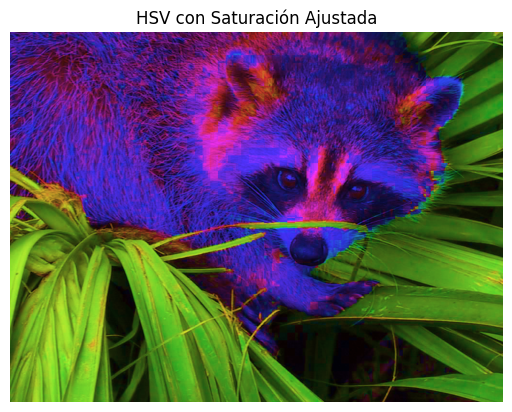

In [14]:
im_hsv_mod = im_hsv.copy()
im_hsv_mod[:, :, 1] = 0.8 #saturacion al 80%
im_rgb_mod = color.hsv2rgb(im_hsv_mod)

plt.imshow(im_rgb_mod)
plt.title("HSV con Saturaci√≥n Ajustada")
plt.axis('off')
plt.show()

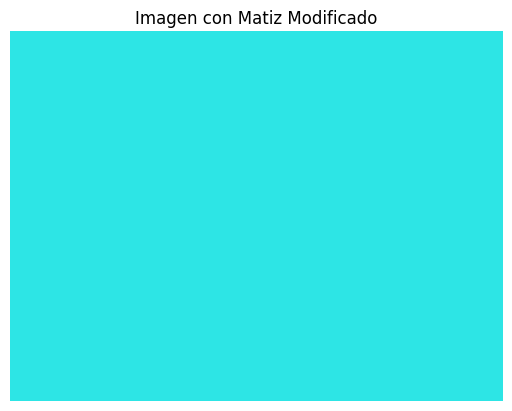

In [16]:
im_hsv_mod = im_hsv.copy()  # Crea una copia de la imagen HSV

# Cambia el matiz a 0.5 (cian), ajusta este valor a tu preferencia
im_hsv_mod[:, :, 0] = 0.5

# Luego, si deseas ajustar la saturaci√≥n o el brillo, puedes hacerlo tambi√©n
im_hsv_mod[:, :, 1] = 0.8  # Por ejemplo, saturaci√≥n al 80%
im_hsv_mod[:, :, 2] = 0.9  # Brillo al 90%

# Convierte la imagen modificada de nuevo a RGB
im_rgb_mod = color.hsv2rgb(im_hsv_mod)

# Muestra la imagen
plt.imshow(im_rgb_mod)
plt.title("Imagen con Matiz Modificado")
plt.axis('off')
plt.show()


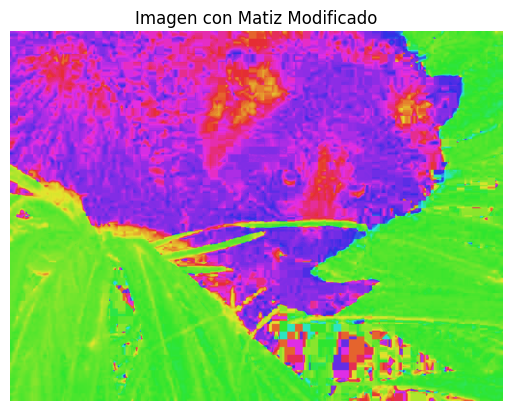

In [17]:
im_hsv_mod = im_hsv.copy()  # Crea una copia de la imagen en HSV

# Cambiar el matiz de manera sutil, por ejemplo, incrementar ligeramente el matiz
im_hsv_mod[:, :, 0] = im_hsv_mod[:, :, 0] + 0.05  # Cambiar el matiz ligeramente

# Asegurarse de que el valor de matiz est√© en el rango de [0, 1]
im_hsv_mod[:, :, 0] = np.mod(im_hsv_mod[:, :, 0], 1)

# Opcionalmente, tambi√©n puedes modificar la saturaci√≥n o brillo si deseas:
im_hsv_mod[:, :, 1] = 0.8  # Saturaci√≥n al 80%
im_hsv_mod[:, :, 2] = 0.9  # Brillo al 90%

# Convertir de nuevo a RGB
im_rgb_mod = color.hsv2rgb(im_hsv_mod)

# Mostrar la imagen
plt.imshow(im_rgb_mod)
plt.title("Imagen con Matiz Modificado")
plt.axis('off')
plt.show()


In [20]:
from google.colab import files
from PIL import Image

# Convierte el array NumPy de nuevo a imagen para mostrarla o guardarla
im_pil = Image.fromarray(im)

# Guarda la imagen con el nombre 'imagen.jpg'
im_pil.save("imagen.jpg")

# Luego descarga el archivo guardado
files.download("imagen.jpg")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

B. Convertir a Escala de Grises

Shape: (768, 1024)


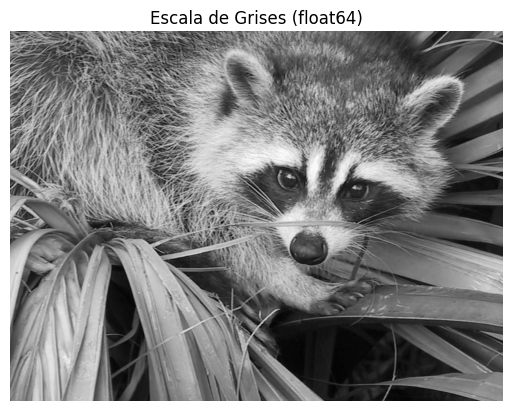

In [21]:
im_gris = color.rgb2gray(im)  # scikit-image (rango 0-1)
print("Shape:", im_gris.shape)  # (alto, ancho)

# Mostrar
plt.imshow(im_gris, cmap='gray')  # Muestra la imagen con matplotlib
plt.title("Escala de Grises (float64)")  # T√≠tulo para la imagen
plt.axis('off')  # Oculta los ejes
plt.show()  # Muestra el gr√°fico con la imagen

Ejercicio 1:

¬øQu√© pasa si convertimos una imagen RGB a escala de grises usando solo el canal rojo (im[:, :, 0])? Comparar con rgb2gray.

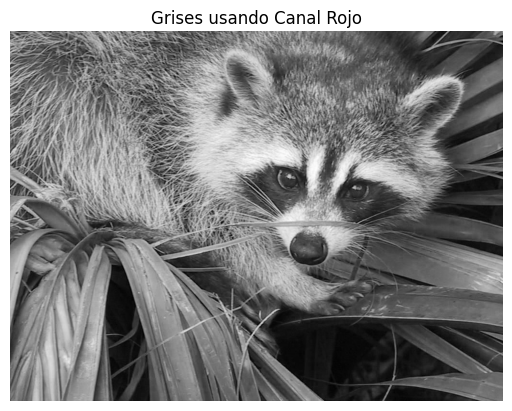

In [22]:
im_gris_rojo = im[:, :, 0]  # Solo canal R
plt.imshow(im_gris_rojo, cmap='gray')  # Muestra la imagen con matplotlib
plt.title("Grises usando Canal Rojo")  # T√≠tulo para la imagen
plt.axis('off')  # Oculta los ejes
plt.show()  # Muestra el gr√°fico con la imagen

##6. Estructuras de Datos y Conversiones

A. De PIL a NumPy (y viceversa)

In [23]:
# PIL ‚Üí NumPy
im_pil = Image.open("imagen.jpg")
im_np = np.array(im_pil)  # Convertir a ndarray

# NumPy ‚Üí PIL
im_np = data.astronaut()  # Carga una imagen de ejemplo (foto de un astronauta) como array de NumPy
im_pil = Image.fromarray(im_np)  # Convierte el array NumPy de nuevo a imagen para mostrarla o guardarla

## 7. Resumen de Funciones Clave

| Operaci√≥n | Funci√≥n | Biblioteca |
|---|---|---|
| Leer imagen | `io.imread()` | scikit-image |
| RGB a HSV | `color.rgb2hsv()` | scikit-image |
| Escala de grises | `color.rgb2gray()` | scikit-image |
| Guardar imagen | `Image.save()` | PIL |
| Visualizar m√∫ltiples im√°genes | `io.imshow_collection()` | scikit-image |